# NumPy: Arrays and Vectorized Computations
## DAT540 Introduction to Data Science
## University of Stavanger
### L07.01
### 06/09/2019

#### Antorweep Chakravorty (antorweep.chakravorty@uis.no)

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt

- **Random Walks**
- A path sequence based on a random probability distribution that determines the number of steps and the odds required to reach a location.
- Another common use case is to identify the number of steps required to reach back to the point of origin after initiating a random walk
- In case of 1-D or 2-D space, we always converge, however, as we increase the dimensionality the probability of convergence to the origin decreases as the amount of traversal space increases
- A random walk on a 1-D space, offers only forward or backward movements
- A walk on a 2-D space, offers north, south, east or west wise movements

- A simple random walk on 1-D space
<img src='randomwalks.png'>

In [42]:
# First Crossing time, the number of steps at which a random walk reaches a purticular value
# Here we want to figure out how long/steps does it take for a random walk to get to a location 
# atleast 10 units in either direction away from origin in a 1-D plane
np.random.seed(234)
nsteps = 1000 # Let us run execute the random walk for 1000 steps
draws = np.random.randn(nsteps)
steps = np.where(draws > 0, 1, -1) # represent steps: forward as +1 and backward -1
walk = steps.cumsum()

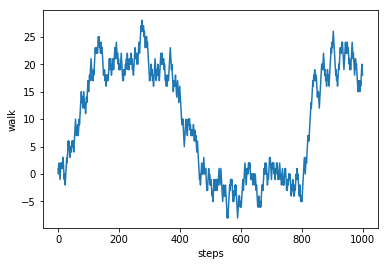

No. of steps required to reach a crossing time of 10: [57]


In [43]:
%matplotlib inline
plt.plot(walk)
plt.ylabel('walk')
plt.xlabel('steps')
plt.show()
loc10 = np.argwhere(walk>=10)[0] # get the index where we reach 10 units away from the origin the 1st time
print('No. of steps required to reach a crossing time of 10:', loc10)

- How will you simulate a single in a 2D space?
- How will you find out the 1st intersection point of Multiple Random Walks on a 2D plane
  - Having the same start for all
  - Having random start for all

# Getting Started with pandas
## DAT540 Introduction to Data Science
## University of Stavanger
### L07.2
### 06/09/2019

#### Antorweep Chakravorty (antorweep.chakravorty@uis.no)

- **pandas** contains data structures and data manipulation tools designed to make data cleaning and analysis faster
- it is often used in tandem with numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotib
- pandas adopts significant parts of NumPy's idiomatic style of array-based computing, especially array-based functions and a preference for data processing without loops
- pandas is particularly designed for working with tabular (2-D) heterogeneous data
- In order to use pandas, we need to first import it and other required modules
- *DataFrame* and *Series* are two pandas data structures that would be used extensively

```python 
import pandas as pd
# import DataFrame and Series, when required as follows
from pandas import Series, DataFrame
```

In [4]:
import pandas as pd
from pandas import Series, DataFrame

- pandas **Data Structures**
  - **Series**
    - A one dimensional array-like object containing a sequence of values
    - It also contains an associated array of data labels called *index* 
    - By default, it automatically assigns indices from 0 to N - 1 (where N is the length of the data), when a Series is created over a list of values
    - A Series, could be created with an additional argument, specifying the list of indices for the values as well

In [5]:
# index labels not provided. Therefore, a default list would be created, starting from zero index
obj = Series([4, 'A', '6.0', -1])
# dtype is the object where we have heterogeneous data. 
# If all the data are of same time, the dtype of the series would be the same 
print(obj) 
print('\nList of indices can be retrived using \'obj.index\'. \nIn this case, it is a object like python range:', obj.index)
print('\nList of values can be retrived using \'obj.value\':', obj.values)


# Custom index labels provided
obj2 = Series([3, 2, -5, 0, 4], index=['a', 'b', 'c', 'd', 'e'] )
# In this case, the dtype of the series is the same as all values in it are of type int64
print("\nObject with custom indices\n")
print(obj2)

0      4
1      A
2    6.0
3     -1
dtype: object

List of indices can be retrived using 'obj.index'. 
In this case, it is a object like python range: RangeIndex(start=0, stop=4, step=1)

List of values can be retrived using 'obj.value': [4 'A' '6.0' -1]

Object with custom indices

a    3
b    2
c   -5
d    0
e    4
dtype: int64


- Element(s) from a Series could be retrieved using similar mechanisms to that with 1-D ndarrays in NumPy, provided the underlying dtype supports it
  - on single Index
  - Basic Indexing       
  - Fancy Indexing
  - Boolean Indexing    
- Additionally, elements can also be retrieved using the labels and combined with most of the above indexing methods

In [6]:
print('obj2:\n', obj2)
print('\nRetriving a single element:', obj2[2])
print('\nRetriving a slice:\n', obj2[2:5])
print('\nRetriving a slice with all values except the last:\n', obj2[:-1])

obj2:
 a    3
b    2
c   -5
d    0
e    4
dtype: int64

Retriving a single element: -5

Retriving a slice:
 c   -5
d    0
e    4
dtype: int64

Retriving a slice with all values except the last:
 a    3
b    2
c   -5
d    0
dtype: int64


In [7]:
print('obj2:\n', obj2)
print('\nUsing Fancy Indexing:\n', obj2[[2,1,2,3]])
print('\nUsing Boolean Indexing:\n', obj2[obj2 > 0])

obj2:
 a    3
b    2
c   -5
d    0
e    4
dtype: int64

Using Fancy Indexing:
 c   -5
b    2
c   -5
d    0
dtype: int64

Using Boolean Indexing:
 a    3
b    2
e    4
dtype: int64


In [8]:
print('obj2:\n', obj2)
print('\nRetriving a single element by label:', obj2['b'])
print('\nRetriving a slice:\n', obj2['b':'d'])
print('\nUsing Fancy Indexing:\n', obj2[['b', 'a', 'b']])
print('\nUsing Boolean Indexing:\n', obj2[[True,True,False,False,True]])

obj2:
 a    3
b    2
c   -5
d    0
e    4
dtype: int64

Retriving a single element by label: 2

Retriving a slice:
 b    2
c   -5
d    0
dtype: int64

Using Fancy Indexing:
 b    2
a    3
b    2
dtype: int64

Using Boolean Indexing:
 a    3
b    2
e    4
dtype: int64


- Series can be also conceptualized as a fixed-length, ordered dict
- Mapping index values to data values

```python
IN[]: 'b' in obj2 # checks on keys
OUT[]: True

IN[]: 'z' in obj2
OUT[]: False
```
- A Series can be created by directly passing a dict object to the Series method. 
- In this case, the keys of the dicts would be converted into labels for the Series
- Alternatively, the index argument could also be provided, to filter the dict elements that we want into the Series
- Specified indices that are present in the dict, are included into the Series
- Indices those are not in the dict, but specified in the Series are set to have values NA values

In [9]:
my_dict = {'a': 1, 'b': 2, 'f': 9, 'c': -1}
obj3 = Series(my_dict)
print('obj3:\n', obj3)

# It selected and replaced the the labels for the keys that it found, for others a Not a Number value was assigned
obj4 = Series(my_dict, index=['b', 'c', 'x'])
print('obj4:\n', obj4)

obj3:
 a    1
b    2
f    9
c   -1
dtype: int64
obj4:
 b    2.0
c   -1.0
x    NaN
dtype: float64


- Series additionally also have top-level and instance methods *isnull* and *isna* to detact missing data

In [10]:
obj4.isnull()

b    False
c    False
x     True
dtype: bool

- Series automatically aligns by index label for arithmetic operations
- They act similar to outer joins while performing the the operations on the values
- If the keys are not found in either of the input series, a NA value is associated to them as the arithmetic operation would not be successful for them

In [11]:
a = Series(np.random.randint(0,10, 4), index=['c', 'd', 'b', 'e'])
b = Series(np.random.randint(0,10, 4), index=['x', 'c', 'e', 'b'])
print('a:\n', a)
print('b:\n', b)
a + b

a:
 c    9
d    3
b    8
e    4
dtype: int64
b:
 x    3
c    7
e    8
b    8
dtype: int64


b    16.0
c    16.0
d     NaN
e    12.0
x     NaN
dtype: float64

- The Series object itself and its index have a **name** attribute

In [12]:
obj4.name = 'cname'
obj4.index.name = 'cindex'
obj4

cindex
b    2.0
c   -1.0
x    NaN
Name: cname, dtype: float64

- The Series index and values can be altered in place

In [13]:
obj4 = Series({'a': 1, 'b': 2, 'f': 9, 'c': -1})
# Indexing on Series follows the same rules like NumPy Array when creating a view or copy
# Index based on Basic indexing doesnot create a copy
x = obj4[1:3]
x[:] = 10
y = obj4[:'b'] 
y[:] = -10

# Fancy Indexing and Boolean indexing create a copy
z = obj4[[2,1]]
z[:] = 99

# only index f now has value 10
b = obj4[obj4.values == 10]
b[:] = 100

# We can also completely change the index lables in place
obj4.index = ['a1', 'b1', 'f1', 'c1']
print('obj4:\n', obj4 )

obj4:
 a1   -10
b1   -10
f1    10
c1    -1
dtype: int64


  - **DataFrame**
  - Represents a rectangular table of data representing rows and columns
  - Each column in a DataFrame could have different data types 
  - Dataframe has labels/indices for both rows and columns. Alternatively, it can be conceptualized as a dict of Series all sharing the same index
  - Typically a DataFrame can be constructed from a dict of equal length list of NumPy arrays
  - A sequence of columns can be specified to the columns attribute of a DataFrame when creating it to 
    - filter the selected columns
    - order the columns
  - A sequence of labels can be specified to the row attribute to index the rows. If the row attribute is not specified, the rows are indexed from 0 to N-1 (N being the total number of rows)
  - If a specified column isn't contained in the dict, it appears with missing values
  

In [14]:
data = {'name': ['abc', 'def', 'ghi', 'jkl', 'mno'], 'age': [23, 74, 31, 16, 34], 'height': [170.2, 164.0, 168.0, 140.0, 170.0]}
frame = pd.DataFrame(data, columns = ['age', 'name', 'xyz'], index = ['one', 'two', 'three', 'four', 'five'])
frame

,age,name,xyz
one,23,abc,NaN
two,74,def,NaN
three,31,ghi,NaN
four,16,jkl,NaN
five,34,mno,NaN


  - DataFrames have multiple helper instance methods, that allows easy investigation of a frame
  - The *head* instance method shows the first 5 rows of a data frame. An integer value could be passed to the head method to retrieved that many rows
  - Similarly the *tail* method show the last 5 or specified number of rows of a dataframe
  - A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute

In [15]:
frame = pd.DataFrame(data, columns = ['name', 'height', 'age'], index = ['one', 'two', 'three', 'four', 'five'])
print(frame.head())
print('\n', frame.name.head(2))
print('\n', frame['name'].tail(2))

      name  height  age
one    abc   170.2   23
two    def   164.0   74
three  ghi   168.0   31
four   jkl   140.0   16
five   mno   170.0   34

 one    abc
two    def
Name: name, dtype: object

 four    jkl
five    mno
Name: name, dtype: object


  - Rows of a DataFrame can be retrieved by position or name/rowlabel with the loc attribute
  - Columns can be modified in-place by assignment
  - A new column could be created also by assignment, with a new column name as index
  - When a column is assigned while creating anew or updating, its length must match with the length of the DataFrame columns
  - If a Series is assigned to a column, it labels will be realigned exactly to the DataFrames' index, inserting missing values
  - The *del* keyword or *drop* instance method can be used to remove a columns

In [16]:
frame = pd.DataFrame(data, columns = ['name', 'height', 'age', 'nha'], index = ['one', 'two', 'three', 'four', 'five'])
print('Retriving a row:\n', frame.loc['one'])

# Changing the values of an existing column
frame['height'] = np.random.randint(150, 180, 5)

# Adding a new column
frame['asd'] = np.arange(5)

# Updating a column via indexed Series
val = Series(np.random.randint(10, 20, 4), index=['one', 'three', 'five', 'seven'])
frame['nha'] = val

Retriving a row:
 name        abc
height    170.2
age          23
nha         NaN
Name: one, dtype: object


In [17]:
frame

,name,height,age,nha,asd
one,abc,164,23,18.0,0
two,def,179,74,NaN,1
three,ghi,162,31,11.0,2
four,jkl,154,16,NaN,3
five,mno,165,34,12.0,4


In [18]:
del frame['asd']
frame.drop('nha', axis=1)

,name,height,age
one,abc,164,23
two,def,179,74
three,ghi,162,31
four,jkl,154,16
five,mno,165,34


  - Nested dict can also be used to create a DataFrame
  - pandas will interpret the outer dict keys as columns and the inner keys as the row indices
  - A DataFrame can be transposed (swap rows and columns) similar to NumPy array
  - A new DataFrame can be created from an existing DF, by selecting the columns that are required to be inserted

In [19]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame1 = DataFrame(pop)

In [20]:
frame1

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [21]:
# Transposing a DF
frame1.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [22]:
# Creating a new DF from an exisiting one
frame2 = DataFrame({'Ohio': frame1['Ohio'][:-1],
                   'Neveda': frame1['Nevada'][:2]})
frame2

,Ohio,Neveda
2000,1.5,NaN
2001,1.7,2.4


- All index row names and column names can also be changed 
- Additionally, a frame index and column title can be directly set using its name attribute
- If all the rows and column names are changed, then the change of title statement should be always called after it
- When all the data contained in a DataFrame are returned, it gets returned as a 2-D array
- If columns are heterogeneous in the DataFrame, the dtype of the values array will be of type *object*

In [23]:
# Changing all column and row names
frame2.columns =  ['x', 'y']
frame2.index = [0, 1]

# Changing column and row titles / axis names
frame2.index.name = 'year'
frame2.columns.name = 'state'

frame2

state,x,y
year,,
0,1.5,NaN
1,1.7,2.4


In [24]:
# retriving all values/columns from the DF. A homogeneous DF
frame2.values

array([[1.5, nan],
       [1.7, 2.4]])

In [25]:
# retriving all values/columns from the DF. A heterogeneous DF
obj.values

array([4, 'A', '6.0', -1], dtype=object)

  - Input types for DataFrames
<img src='df_inputs.png'>

  - **Index Objects**
  - pandas Index objects are responsible for holding the axis labels and other metadata
    - like axis names or names
  - Any array or other sequence of labels used when constructing a Series or DataFrame is internally converted to an Index
  - Index objects are immutable
  - Making it safer to share Index objects among data structures
  - Index objects also behaves like a fixed-size set, meaning we can perform certain set operations
  - However, pandas index can contain duplicate labels

  - Index Objects Methods
<img src='./index_methods.png'>

In [26]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index

index

Index(['a', 'b', 'c'], dtype='object')

In [27]:
index[1:]

Index(['b', 'c'], dtype='object')

In [28]:
# index[1] = 'd' # TypeError

In [29]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [30]:
obj2 = Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [31]:
obj2.index is labels

True

In [32]:
frame2

state,x,y
year,,
0,1.5,NaN
1,1.7,2.4


In [33]:
print(frame2.columns)
print('\'y\' in frame2.columns:', 'y' in frame2.columns )
print('0 in frame2.index:', 0 in frame2.index)

Index(['x', 'y'], dtype='object', name='state')
'y' in frame2.columns: True
0 in frame2.index: True
